# Linear Congruential Generators

These widely-used generators are of the form 

$$X_{n+1} = (aX_n + c)\ \mathrm{mod}\ m.$$

Notes:

- The starting value of $X$ is the *seed*. If the sequence ever produces the seed again at a later iteration, it will start over with the same sequence of numbers. How long this takes is the *period* of the generator.
- The modulus $m$ sets the maximum period of the random number sequence (although the period can be much smaller for bad choices of $a$ and $c$).
- To return a floating point number between 0 and 1, we can divide by $m$.
- A list of different choices of parameters is given on the [Wikipedia page for linear congruential generators](https://en.wikipedia.org/wiki/Linear_congruential_generator) -- we explore some of these below and compare with the build in numpy generator. (Note that you should always use a well-tested generator like the numpy one rather than coding your own, the tests below should show you why!)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is the implementation of an LCG from Wikipedia
# https://en.wikipedia.org/wiki/Linear_congruential_generator
# (simplified by removing type info)

def lcg(modulus, a, c, seed):
    """Linear congruential generator."""
    while True:
        seed = (a * seed + c) % modulus
        yield seed

<Figure size 640x480 with 0 Axes>

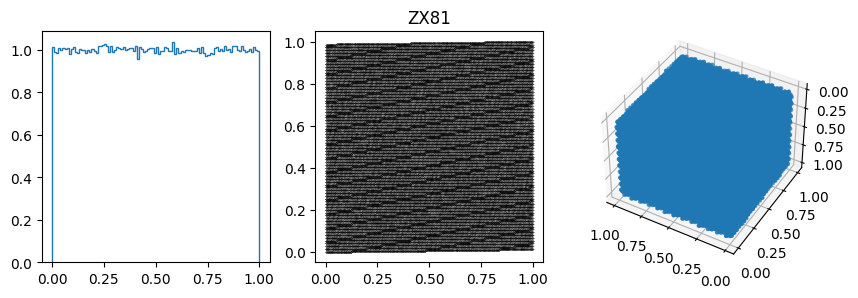

<Figure size 640x480 with 0 Axes>

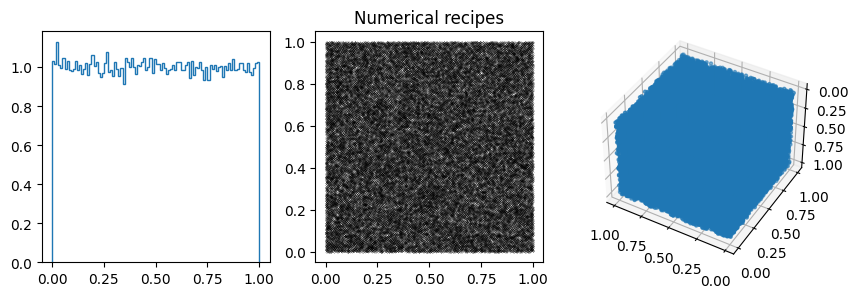

<Figure size 640x480 with 0 Axes>

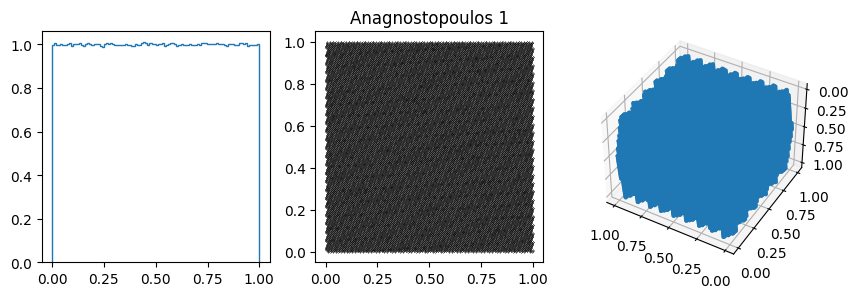

<Figure size 640x480 with 0 Axes>

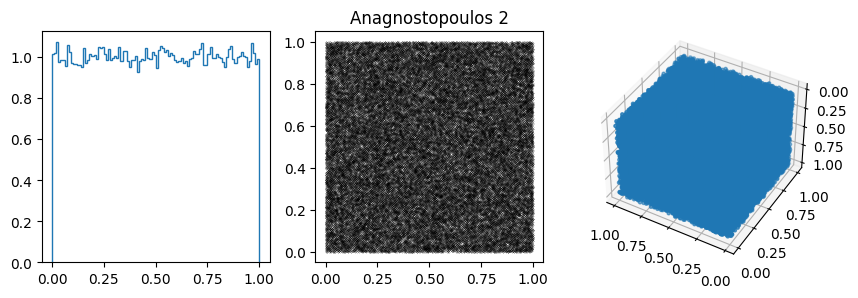

<Figure size 640x480 with 0 Axes>

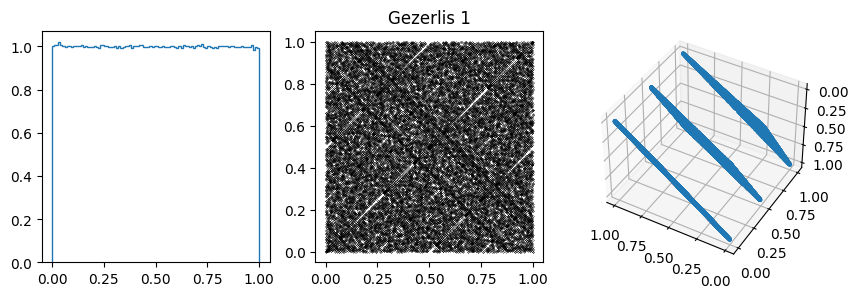

<Figure size 640x480 with 0 Axes>

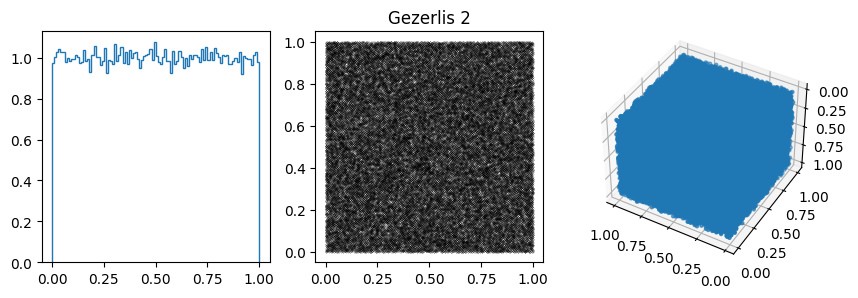

<Figure size 640x480 with 0 Axes>

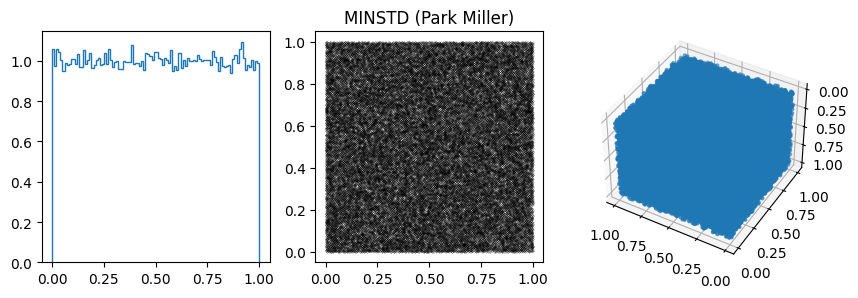

<Figure size 640x480 with 0 Axes>

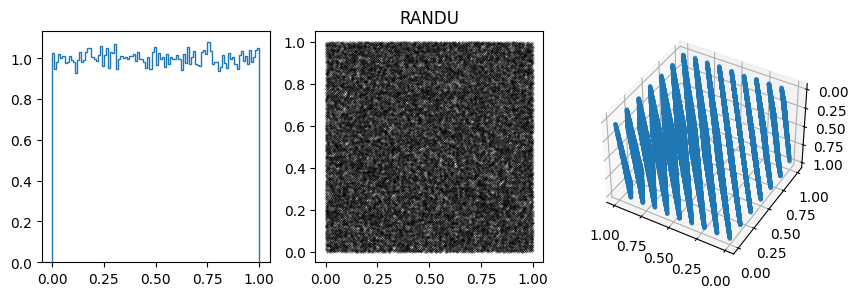

<Figure size 640x480 with 0 Axes>

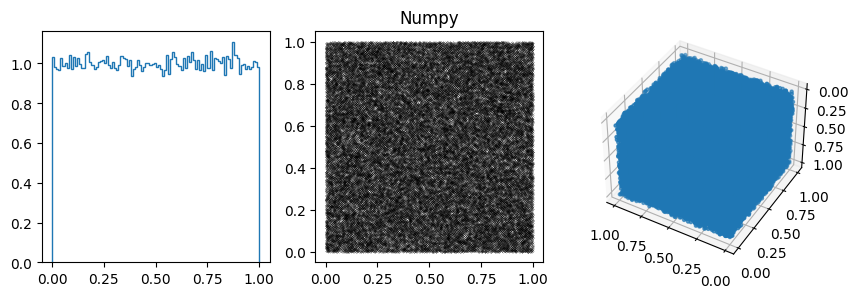

In [3]:
# Make some plots to compare different choices of LCG parameters

params = []
# the parameters are:   m,  a,  c,  seed,  name
params.append([2**16+1, 75, 74, 33, "ZX81"])
params.append([2**32, 1664525, 1013904223, 33, "Numerical recipes"])
params.append([2**17, 1277, 0.0, 13337, "Anagnostopoulos 1"])
params.append([2**31-1, 7**5, 0.0, 323412, "Anagnostopoulos 2"])
params.append([2**32, 2**18 + 1, 7, 33, "Gezerlis 1"])
params.append([2**32, 1812433253, 7, 33, "Gezerlis 2"])
params.append([2**31-1, 7**5, 0, 33, "MINSTD (Park Miller)"])
params.append([2**31, 65539, 0, 33, 'RANDU'])
params.append([-1, -1, -1, 56, "Numpy"])

for m, a, c, seed, name in params:
    if m == -1:
        samples = np.random.default_rng(seed).uniform(size = 10**5)
    else:   
        samples = np.fromiter(lcg(m, a, c, seed), float, count = 10**5)
        samples = samples/m

    plt.clf()    
    fig = plt.figure(figsize=(10,3))

    # 1D distribution
    ax1 = fig.add_subplot(131)
    ax1.hist(samples, density=True, bins=100, histtype = 'step')

    # 2D x_i against x_{i+1}
    ax2 = fig.add_subplot(132)
    ax2.plot(samples[1:], samples[:-1], 'k.', ms=0.2)
    plt.title(name)

    # 3D x_i, x_{i+1} and x_{i+2}
    ax3 = fig.add_subplot(133, projection='3d')
    
    # zoom in on part of the data
    #cutoff = 0.05
    #samples = samples[np.where(samples<cutoff)]
    #ax3.set_xlim(0,cutoff)
    #ax3.set_ylim(0,cutoff)
    #ax3.set_zlim(0,cutoff)
    
    ax3.scatter(samples[:-2], samples[1:-1], samples[2:], marker='.')
    ax3.view_init(-140, 60)    
    plt.show()

Notes:

- You can often spot the bad generators from the bin-to-bin variations of the 1D distribution. (E.g. ZX81, Anagnostopoulos 1 and Gezerlis 1 all have smaller than expected variance.) One other thing we could look at is how the bin-to-bin variations scale with the number of samples (expect the standard deviation from a uniform distribution to go down as $1/\sqrt{N}$.
- In other cases, the 1D distribution looks acceptable, but you can see correlations in the 2d plot, ie. successive samples are correlated. In others, e.g. RANDU, these emerge in the 3D plots.
- These generators all have the property that when used to make a $n$-d plot, the points do not fill up the whole space, but instead lie on $(n-1)$d hyperplanes (so 2d planes in the 3d plot or lines in the 2d plot). There are at most about $(n! m)^{1/n}$ planes, which is not that large, e.g. $m=2^{31}$ then for $n=3$ we get $(6m)^{1/3}\sim 2300$. 
- A related issue with these generators is that often the least significant bits are much less random then the most significant bits. E.g. change the 2D plots to log-log and look at the behavior of small numbers, for example in MINSTD.

**Further reading**

- [Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)
- More on [RANDU](https://en.wikipedia.org/wiki/RANDU), which was used a lot in the 1960s and 1970s, but as we saw above is not a good generator, with significant correlations.
- [Remarks on choosing and implementing random number generators](https://www.firstpr.com.au/dsp/rand31/p105-crawford.pdf)
- Documentation for NumPy's random sampling routines can be found at [`numpy.random`](https://numpy.org/doc/stable/reference/random/index.html) including the [PCG64](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64) generator which is the default generator in numpy. Note that is has a period of $2^{128}$ ($\sim 10^{38}$), much larger than the examples above!
- Having a high quality random number generator is particularly important for cryptography. A starting point is the wikipedia article on [Cryptographically secure pseudorandom number generator](https://en.wikipedia.org/wiki/Cryptographically_secure_pseudorandom_number_generator).
